Stackoverflow Off-Platform Project 
prompt:
"""You work for a staffing agency that specializes in finding qualified candidates for development roles. One of your latest clients is growing rapidly and wants to understand what kinds of developers they can hire, and to understand general trends of the technology market. Your organization has access to this Stack Overflow dataset, which consists of survey responses by developers all over the world for the last few years.

Your project is to put together several statistical analyses about the community to educate your client about the potential hiring market for their company."""

Project Steps
1. Explore Data
2. Delete highly missing data
3. Analyze developers by country
4. Investigate developer undergraduate majors
5. Examine the relationship between years of experience and compensation
6. Summary and Results


In [168]:
#Import all neccesary libraries to perform analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [169]:
#1. Explore Data, find columns of interest
dftest = pd.read_csv("developer_dataset.csv", low_memory=False)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',504)
pd.set_option('display.width',150)
#print(df.head())
#print(dftest.columns)
#print(len(dftest.columns))
#ID Column is 'RespondentID'
#print(df.dtypes)

columns_of_interest = dftest[["RespondentID", "Year", "Country", "Employment", "UndergradMajor", "YearsCodePro", "ConvertedComp"]]
df = pd.DataFrame(columns_of_interest)


#print(df.head())
#print(df.UndergradMajor.unique())


In [170]:
#2. Delete highly missing data
def printNaN():
    for x in (df.columns):
        print(f"# NaN values in {x}: {df[x].isnull().sum()}")
print("----------------------------------------------------------------------------------------------------------------")
print("NaN Values before filling Nan")
printNaN()
print("----------------------------------------------------------------------------------------------------------------")

#Want to fill the NaN values in the ConvertedComp with the average compensation in the country for that user.
country_means_income = df.groupby('Country')['ConvertedComp'].transform(lambda x: x.mean(skipna=True))
# Fill NaN values in 'Income' with the corresponding country mean
df['ConvertedComp'] = df['ConvertedComp'].fillna(country_means_income)

##Want to fill the NaN values in the YearsCodePro with the average YearsSpentPro in the country for that user.
country_means_years = df.groupby('Country')['YearsCodePro'].transform(lambda x: x.mean(skipna=True))
# Fill NaN values in 'YearsCodePro' with the corresponding country mean
df['YearsCodePro'] = df['YearsCodePro'].fillna(country_means_years)

print("NaN Values after filling Nan")
printNaN()
print("----------------------------------------------------------------------------------------------------------------")
before = (len(df))
df.dropna(how="any", inplace=True)
after = (len(df))
print(f"Before Deletion we had {before} values, after filling numerical NaNs with corresponding averages and dropping the rest we have {after} rows of data left. Total Amount Deleted: {before - after} Data points")

----------------------------------------------------------------------------------------------------------------
NaN Values before filling Nan
# NaN values in RespondentID: 0
# NaN values in Year: 0
# NaN values in Country: 0
# NaN values in Employment: 1784
# NaN values in UndergradMajor: 12756
# NaN values in YearsCodePro: 16416
# NaN values in ConvertedComp: 19876
----------------------------------------------------------------------------------------------------------------
NaN Values after filling Nan
# NaN values in RespondentID: 0
# NaN values in Year: 0
# NaN values in Country: 0
# NaN values in Employment: 1784
# NaN values in UndergradMajor: 12756
# NaN values in YearsCodePro: 0
# NaN values in ConvertedComp: 0
----------------------------------------------------------------------------------------------------------------
Before Deletion we had 111209 values, after filling numerical NaNs with corresponding averages and dropping the rest we have 97812 rows of data left. Total 

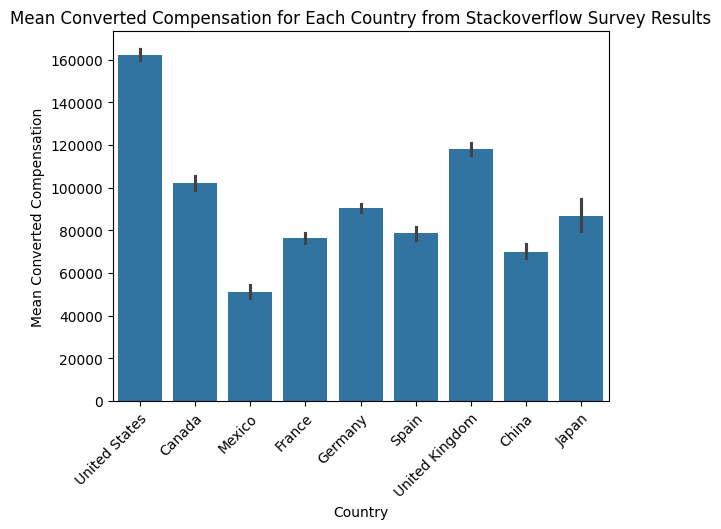

In [171]:
# 3. Analyze developers by country

sns.barplot(data=df, x="Country", y="ConvertedComp")
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.title("Mean Converted Compensation for Each Country from Stackoverflow Survey Results")
plt.ylabel("Mean Converted Compensation")
plt.show()


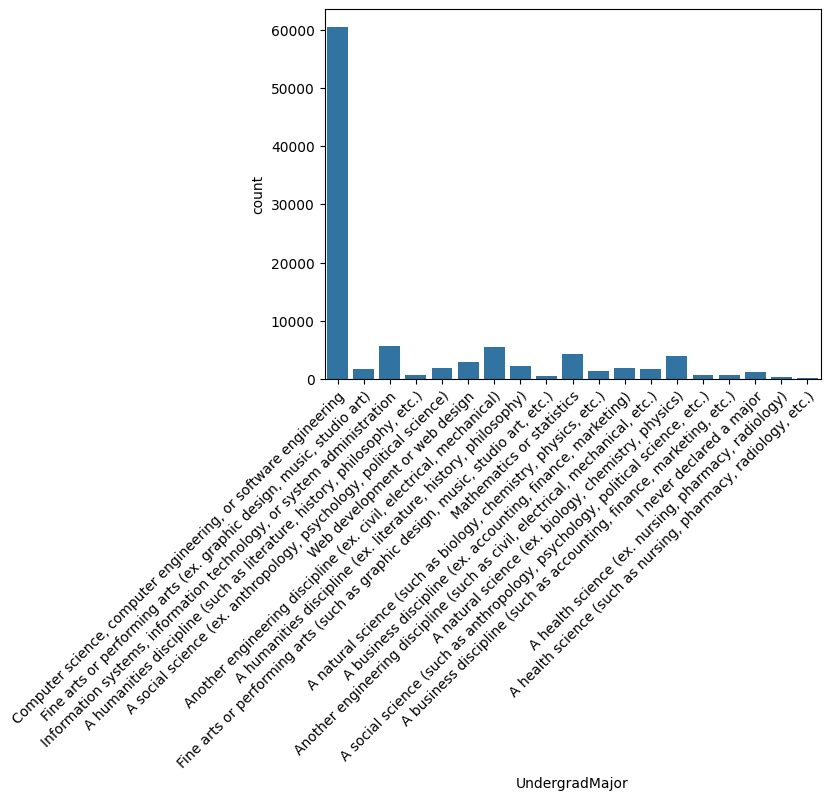

In [175]:
#4. Investigate developer undergraduate majors
sns.countplot(data=df,x=df.UndergradMajor)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

plt.show()

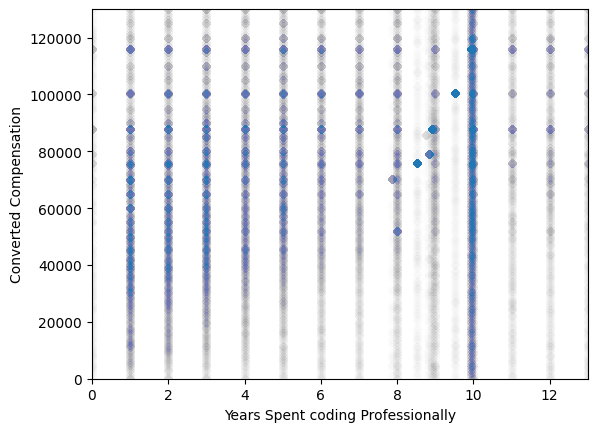

<Figure size 640x480 with 0 Axes>

In [179]:
#5. Examine the relationship between years of experience and compensation
sns.scatterplot(data = df,x=df.YearsCodePro, y=df.ConvertedComp, alpha = 0.002)
plt.xlabel("Years Spent coding Professionally")
plt.ylabel("Converted Compensation")
plt.xlim(0, np.quantile(df.YearsCodePro, 0.75))
plt.ylim(0, np.quantile(df.ConvertedComp, 0.75))
plt.show()
plt.clf()